In [31]:
import re
import glob
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Concatenate all the files

In [2]:
# get path to all files
path = 'data/spectra/simulated_data/'
files = sorted(glob.glob(path + 'model_parameters_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))

vlsr_list = []
filename_list = []

for file in files:
    data = pd.read_csv(file, sep='\t', header=None)
    
    # get the postive and negative float values of line 6 using regular expression
    vlsr_list.append(float(re.findall(r'[+-]?\d+\.\d+', str(data.iloc[5, :]))[0]))

    # append filename to list
    filename_list.append(file.split('/')[-1])

# put the filename and vlsr values in a dataframe
vlsr_df = pd.DataFrame({'filename': filename_list, 'vlsr': vlsr_list})
vlsr_df = vlsr_df[vlsr_df['vlsr']>-60].reset_index(drop=True)
print(vlsr_df['filename'].values)


['model_parameters_data0.txt' 'model_parameters_data1.txt'
 'model_parameters_data6.txt' ... 'model_parameters_data4994.txt'
 'model_parameters_data4995.txt' 'model_parameters_data4998.txt']


In [32]:
path = 'data/spectra/test/'
files = sorted(glob.glob(path + 'model_parameters_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))

# read the data from the files by skipping the first 10 rows for each file. 
df = pd.DataFrame()
dff = pd.DataFrame()
for file in files:
    # get the data points
    df = df.append(pd.read_csv(file, skiprows=10, header=None, sep=' '))
    # get the parameters used
    dff = dff.append(pd.read_csv(file, skiprows=1, nrows=6, header=None, sep=' ', names=['A', 'B', 'C', 'D']))

/var/folders/r8/hbbztfpn4ns1pgl0687hmwp40000gp/T/ipykernel_91032/1809690025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(file, skiprows=10, header=None, sep=' '))
/var/folders/r8/hbbztfpn4ns1pgl0687hmwp40000gp/T/ipykernel_91032/1809690025.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dff = dff.append(pd.read_csv(file, skiprows=1, nrows=6, header=None, sep=' ', names=['A', 'B', 'C', 'D']))
/var/folders/r8/hbbztfpn4ns1pgl0687hmwp40000gp/T/ipykernel_91032/1809690025.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(file, skiprows=10, header=None, sep=' '))
/var/folders/r8/hbbztfpn4ns1pgl0687hmwp40000gp/T/ipykernel_91032/1809690025.py:11: FutureWarning: The f

In [33]:
columns = ['Frequency', 'Intensity']
df.columns = columns
df.shape

(1130000, 2)

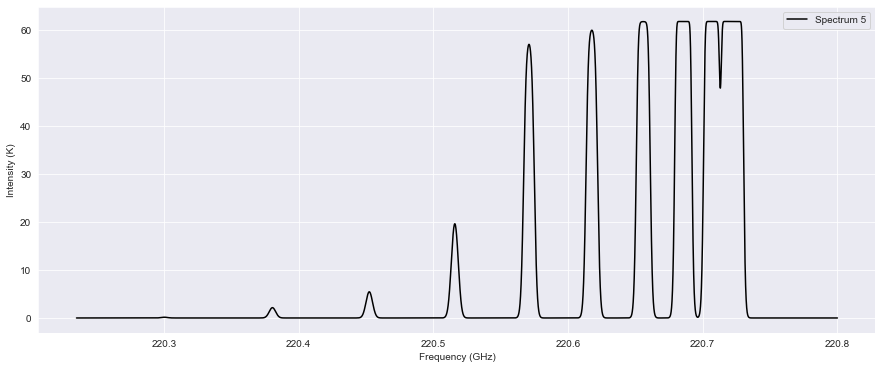

In [47]:
freq_sig = np.array(np.array_split(df['Frequency'], len(files)))
signal = np.array(np.array_split(df['Intensity'], len(files)))

# plot the signal in one plot
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
# plt.plot(freq_sig[0],  signal[0], color='r', label='Spectrum 1')
# plt.plot(freq_sig[1], signal[1], color='g', label='Spectrum 2')
# plt.plot(freq_sig[2], signal[2], color='b', label='Spectrum 3')
# plt.plot(freq_sig[3], signal[3], color='y', label='Spectrum 4')
plt.plot(freq_sig[13], signal[13], color='k', label='Spectrum 5')
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
plt.show()

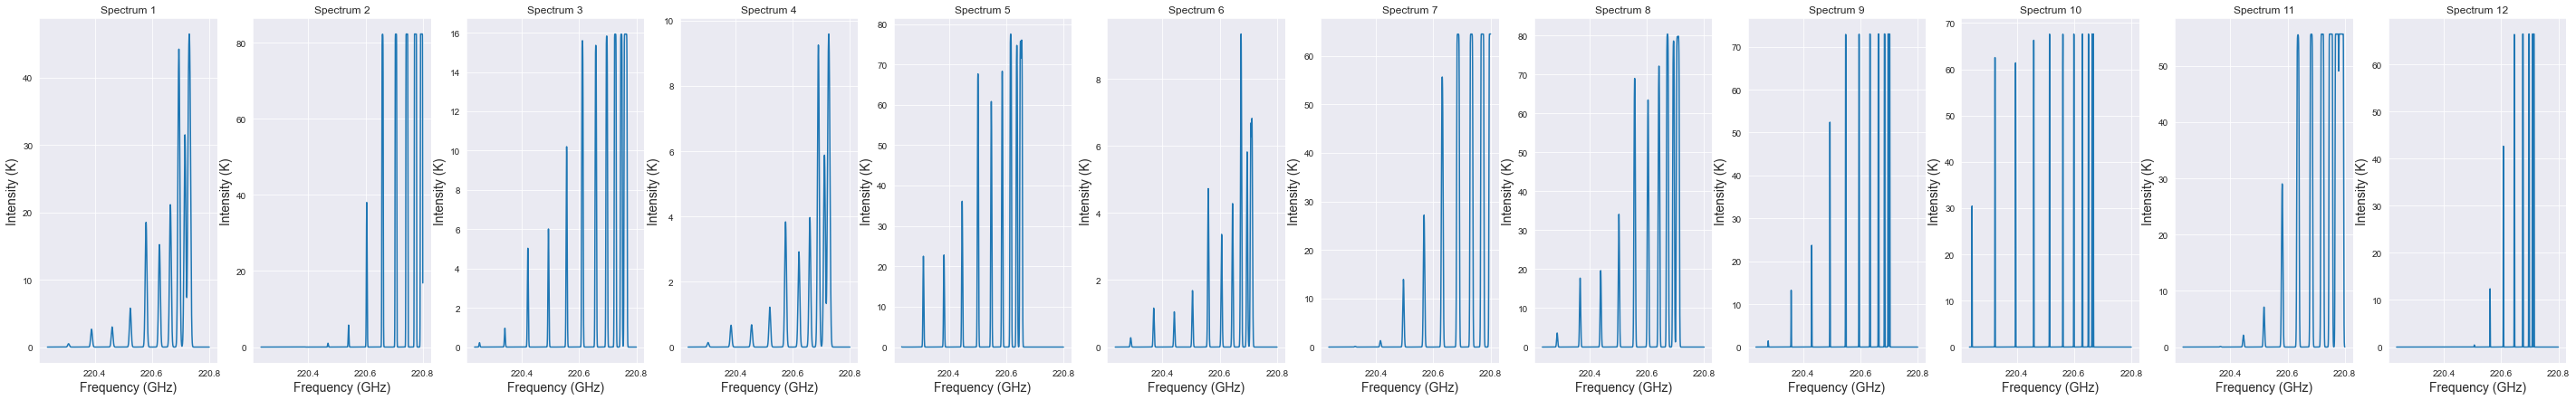

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(50, 7))
sns.set_style("darkgrid")
for i, ax in enumerate(axes.ravel(), start=1):
    ax.plot(freq_sig[i-1], signal[i-1], label='Spectrum {}'.format(i))
    ax.set_xlabel("Frequency (GHz)", fontdict={'fontsize': 14})
    ax.set_ylabel("Intensity (K)", fontdict={'fontsize': 14})
    ax.set_title("Spectrum {}".format(i))

In [ ]:
# start_timer = time.time()
# # get the params data
# df_param = pd.DataFrame()
# for file in files:
#     # get the parameters used
#     df_param = df_param.append(pd.read_csv(file, skiprows=1, nrows=6, header=None, sep=' ', names=['A', 'B', 'C', 'D']))
#     # save the dataframe to a csv file
#     df_param.to_csv('model_parameters_data.csv', index=False)
    
# print(time.time() - start_timer)

#### Load the files 

In [ ]:
start_time = time.time()
df_data = pd.read_csv('data/params/model_parameters_data_all.txt', sep=' ', header=None) # all data dataframe
print(time.time() - start_time)
df_data.head()

In [ ]:
df_data.shape

In [ ]:
df_param = pd.read_csv('data/params/model_parameters_data.csv')
df_param.head()

In [ ]:
# drop the second and fourth column
df_param.drop(['B', 'D'], axis=1, inplace=True)

In [ ]:
# transform the data to the right dataframe
df_param = df_param.assign(g = df_param.groupby('A').cumcount()).pivot(index='g', columns='A', values='C')

In [ ]:
df_param.head(10)

In [ ]:
df_param.columns

In [ ]:
columns = ['Frequency', 'Intensity']
df_data.columns = columns
df_data.shape

In [ ]:
df_data.head()

In [ ]:
freq_sig = np.array(np.array_split(df_data['Frequency'], len(files)))
signal = np.array(np.array_split(df_data['Intensity'], len(files)))

# plot the signal in one plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[0],  signal[0], color='r', label='Spectrum 1')
plt.plot(freq_sig[1], signal[1], color='g', label='Spectrum 2')
plt.plot(freq_sig[2], signal[2], color='b', label='Spectrum 3')
plt.plot(freq_sig[3], signal[3], color='y', label='Spectrum 4')
plt.plot(freq_sig[4], signal[4], color='k', label='Spectrum 5')
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
plt.show()